# Problem Statement

An education company named X Education sells online courses to industry professionals. On any given day, many professionals who are interested in the courses land on their website and browse for courses. 
The company markets its courses on several websites and search engines like Google. Once these people land on the website, they might browse the courses or fill up a form for the course or watch some videos. When these people fill up a form providing their email address or phone number, they are classified to be a lead. Moreover, the company also gets leads through past referrals. Once these leads are acquired, employees from the sales team start making calls, writing emails, etc. Through this process, some of the leads get converted while most do not. The typical lead conversion rate at X education is around 30%. 

To make this process more efficient, the company wishes to identify the most potential leads, also known as ‘Hot Leads’. If they successfully identify this set of leads, the lead conversion rate should go up as the sales team will now be focusing more on communicating with the potential leads rather than making calls to everyone.

X Education has appointed you to help them select the most promising leads, i.e. the leads that are most likely to convert into paying customers. The company requires you to build a model wherein you need to assign a lead score to each of the leads such that the customers with a higher lead score have a higher conversion chance and the customers with a lower lead score have a lower conversion chance. 

The CEO, in particular, has given a ballpark of the target lead conversion rate to be around 80%.

# Goals of the Case Study:
    1. Build a logistic regression model to assign a lead score between 0 and 100 to each of the leads which can be used by the company to target potential leads. A higher score would mean that the lead is hot, i.e. is most likely to convert whereas a lower score would mean that the lead is cold and will mostly not get converted.
    
    2.There are some more problems presented by the company which your model should be able to adjust to if the company's requirement changes in the future so you will need to handle these as well. These problems are provided in a separate doc file. Please fill it based on the logistic regression model you got in the first step. Also, make sure you include this in your final PPT where you'll make recommendations.

## Analysis walkthrough:
    - Understanding of data and data cleaning
    - Data handling/wrangling
    - EDA
    - Model Building
    - Model evaluation
    - Solution and summary

# Step (1) Understanding the dataset


### Step - (1.1)  Importing all the required libraries

In [1]:
import pandas as pd, numpy as np

#supressing warnings
import warnings
warnings.filterwarnings('ignore')

#Visualization
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

#Scaling
from sklearn.preprocessing import StandardScaler


# Model building
from sklearn.model_selection import train_test_split


In [2]:
leads_data = pd.read_csv('Leads.csv')
leads_data.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,...,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,...,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,...,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


### Step - (1.2)  Initial Inspection of dataset

In [3]:
# Checking the dimensions of the dataframe
leads_data.shape

(9240, 37)

In [4]:
# Checking the statistical aspects of dataframe
leads_data.describe()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Score,Asymmetrique Profile Score
count,9240.000000,9240.000000,9103.000000,9240.000000,9103.000000,5022.000000,5022.000000
mean,617188.435606,0.385390,3.445238,487.698268,2.362820,14.306252,16.344883
std,23405.995698,0.486714,4.854853,548.021466,2.161418,1.386694,1.811395
min,579533.000000,0.000000,0.000000,0.000000,0.000000,7.000000,11.000000
25%,596484.500000,0.000000,1.000000,12.000000,1.000000,14.000000,15.000000
50%,615479.000000,0.000000,3.000000,248.000000,2.000000,14.000000,16.000000
75%,637387.250000,1.000000,5.000000,936.000000,3.000000,15.000000,18.000000
max,660737.000000,1.000000,251.000000,2272.000000,55.000000,18.000000,20.000000


In [5]:
# Let's check data types of each feature
leads_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

# Step (2) Data Cleaning


### Step - (2.1) Handling the missing values

#### Observation/Inference: As we are aware that few of the features have an option/level called 'Select' which is nothing but blank cell, we will first replace the data with the same.

In [6]:
leads_data = leads_data.replace('Select',np.nan)

In [7]:
#Checking for missing values now,
round((leads_data.isnull().sum()/len(leads_data)*100),2)

Prospect ID                                       0.00
Lead Number                                       0.00
Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Country                                          26.63
Specialization                                   36.58
How did you hear about X Education               78.46
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Search                                            0.00
Magazine                                          0.00
Newspaper 

#### Observation/Inference: We will drop the features with more than or equal to 35% missing values

In [8]:
# dropping missing values with more than 35%
columns= leads_data.columns

for i in columns:
    if (round((leads_data[i].isnull().sum()/len(leads_data)*100),2)>=35.00):
        leads_data.drop(i,1, inplace=True)

In [9]:
# Confirming the above changes on the dataframe and rechecking the missing values 
round((leads_data.isnull().sum()/len(leads_data)*100),2)

Prospect ID                                       0.00
Lead Number                                       0.00
Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Country                                          26.63
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Search                                            0.00
Magazine                                          0.00
Newspaper Article                                 0.00
X Education Forums                                0.00
Newspaper 

In [10]:
# checking 'What matters most to you in choosing this course' attribute to observe its distribution

# What matters most to you in choosing this course - An option selected by the customer indicating what is their main motto behind doing this course.

print(leads_data['What matters most to you in choosing a course'].value_counts(normalize=100,dropna=False))

Better Career Prospects      0.706494
NaN                          0.293182
Flexibility & Convenience    0.000216
Other                        0.000108
Name: What matters most to you in choosing a course, dtype: float64


#### Observation/Inference: As we can see from above distribution we will go ahead and replace the NaN values with 'Better career Prospects' as it forms 99% of the data and hence will not have impact on the other two categories.

In [11]:
leads_data['What matters most to you in choosing a course'] = leads_data['What matters most to you in choosing a course'].replace(np.nan, 'Better Career Prospects')

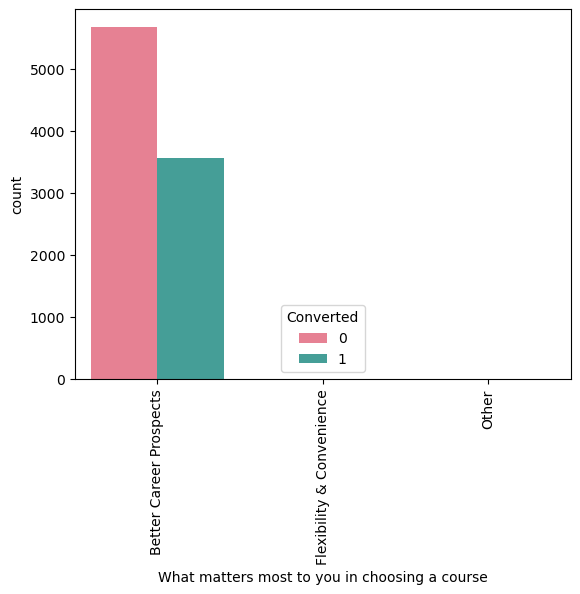

In [12]:
# Lets plot the data to check for any data imbalance

sns.countplot(leads_data['What matters most to you in choosing a course'], hue=leads_data['Converted'], palette='husl')
plt.xticks(rotation=90)
plt.show()

#### Observation/Inference: As we can see data is highly skewed towards 'Better career Prospects', since we cannot infer any useful insight from this, we can drop this feature.

In [13]:
#dropping the feature
leads_data.drop(['What matters most to you in choosing a course'],1,inplace=True)

In [14]:
# Confirming the above changes on the dataframe and rechecking the missing values 
round((leads_data.isnull().sum()/len(leads_data)*100),2)

Prospect ID                                  0.00
Lead Number                                  0.00
Lead Origin                                  0.00
Lead Source                                  0.39
Do Not Email                                 0.00
Do Not Call                                  0.00
Converted                                    0.00
TotalVisits                                  1.48
Total Time Spent on Website                  0.00
Page Views Per Visit                         1.48
Last Activity                                1.11
Country                                     26.63
What is your current occupation             29.11
Search                                       0.00
Magazine                                     0.00
Newspaper Article                            0.00
X Education Forums                           0.00
Newspaper                                    0.00
Digital Advertisement                        0.00
Through Recommendations                      0.00


In [15]:
# checking 'Occupation' attribute to observe its ditribution

# What is your current occupation - Indicates whether the customer is a student, umemployed or employed.


leads_data['What is your current occupation'].value_counts(normalize=100, dropna=False)

Unemployed              0.606061
NaN                     0.291126
Working Professional    0.076407
Student                 0.022727
Other                   0.001732
Housewife               0.001082
Businessman             0.000866
Name: What is your current occupation, dtype: float64

#### Observation/Inference: Since occupation field is missing for more than 29% of the rows, we can replace this with 'Other' category. we will also merge few more lower number of categories into 'Other' category as well.

In [16]:
leads_data['What is your current occupation'] = leads_data['What is your current occupation'].replace(np.nan, 'Other')

In [17]:
leads_data['What is your current occupation'] = leads_data['What is your current occupation'].replace(['Businessman','Housewife'], 'Other')

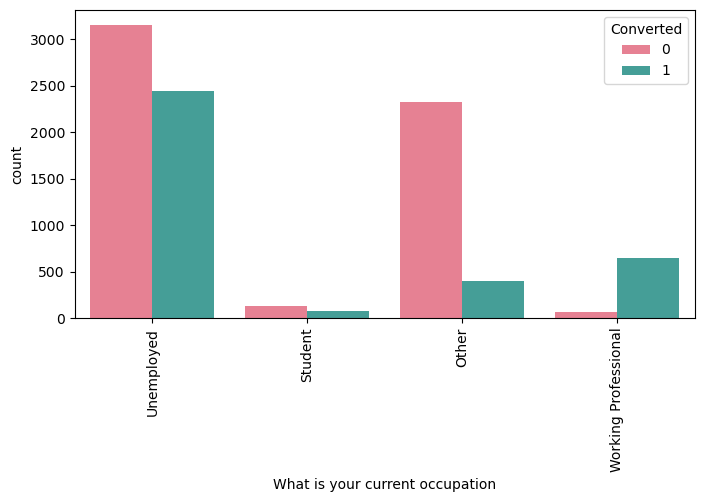

In [18]:
# plotting 
plt.figure(figsize=(8,4))
sns.countplot(leads_data['What is your current occupation'],hue= leads_data['Converted'],palette=("husl"))
plt.xticks(rotation =90)
plt.show()

#### Observation/Inference: While 'Unemployed' category is highest in the volume we can observe higher conversion rate for the category ' Working Professional'.

In [19]:
# Confirming the above changes on the dataframe and rechecking the missing values 
round((leads_data.isnull().sum()/len(leads_data)*100),2)

Prospect ID                                  0.00
Lead Number                                  0.00
Lead Origin                                  0.00
Lead Source                                  0.39
Do Not Email                                 0.00
Do Not Call                                  0.00
Converted                                    0.00
TotalVisits                                  1.48
Total Time Spent on Website                  0.00
Page Views Per Visit                         1.48
Last Activity                                1.11
Country                                     26.63
What is your current occupation              0.00
Search                                       0.00
Magazine                                     0.00
Newspaper Article                            0.00
X Education Forums                           0.00
Newspaper                                    0.00
Digital Advertisement                        0.00
Through Recommendations                      0.00


In [20]:
# Checking the feature 'Country' now,
leads_data['Country'].value_counts(normalize=100,dropna=False)

India                   0.702597
NaN                     0.266342
United States           0.007468
United Arab Emirates    0.005736
Singapore               0.002597
Saudi Arabia            0.002273
United Kingdom          0.001623
Australia               0.001407
Qatar                   0.001082
Bahrain                 0.000758
Hong Kong               0.000758
Oman                    0.000649
France                  0.000649
unknown                 0.000541
Kuwait                  0.000433
South Africa            0.000433
Canada                  0.000433
Nigeria                 0.000433
Germany                 0.000433
Sweden                  0.000325
Philippines             0.000216
Uganda                  0.000216
Italy                   0.000216
Bangladesh              0.000216
Netherlands             0.000216
Asia/Pacific Region     0.000216
China                   0.000216
Belgium                 0.000216
Ghana                   0.000216
Kenya                   0.000108
Sri Lanka 

#### Observation/Inference: As we have lot of country options and data is higly skewed towards 'India', we will replace null values to 'India' as well, and if we find out majority of the data is skewed towards 'India' we can drop this feature too.

In [21]:
leads_data['Country'] = leads_data['Country'].replace(np.nan, 'India')

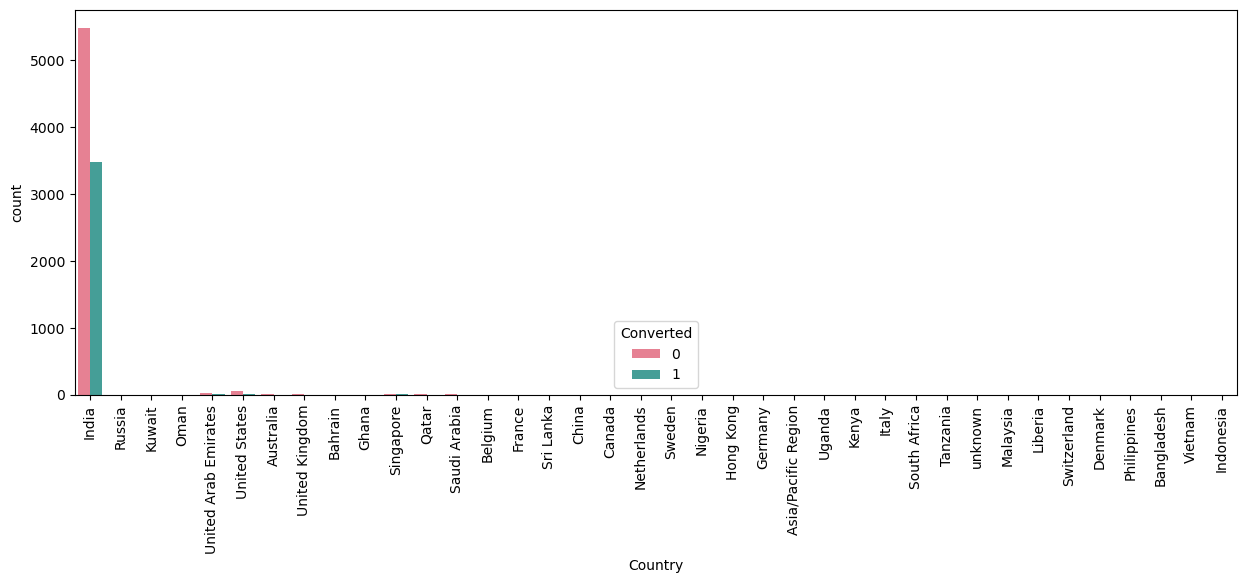

In [22]:
# plotting 'Country'
plt.figure(figsize=(15,5))
sns.countplot(leads_data['Country'],hue=leads_data['Converted'],palette=("husl"))
plt.xticks(rotation =90)
plt.show()

In [23]:
# Dropping 'Country' feature as there is very less variance in the data distribution
leads_data.drop(['Country'],1,inplace=True)

In [24]:
# Confirming the above changes on the dataframe and rechecking the missing values 
round((leads_data.isnull().sum()/len(leads_data)*100),2)

Prospect ID                                 0.00
Lead Number                                 0.00
Lead Origin                                 0.00
Lead Source                                 0.39
Do Not Email                                0.00
Do Not Call                                 0.00
Converted                                   0.00
TotalVisits                                 1.48
Total Time Spent on Website                 0.00
Page Views Per Visit                        1.48
Last Activity                               1.11
What is your current occupation             0.00
Search                                      0.00
Magazine                                    0.00
Newspaper Article                           0.00
X Education Forums                          0.00
Newspaper                                   0.00
Digital Advertisement                       0.00
Through Recommendations                     0.00
Receive More Updates About Our Courses      0.00
Update me on Supply 

In [25]:
# Checking 'Lead Source' now,
leads_data['Lead Source'].value_counts(dropna=False, normalize=100)

Google               0.310390
Direct Traffic       0.275216
Olark Chat           0.189935
Organic Search       0.124892
Reference            0.057792
Welingak Website     0.015368
Referral Sites       0.013528
Facebook             0.005952
NaN                  0.003896
bing                 0.000649
google               0.000541
Click2call           0.000433
Press_Release        0.000216
Social Media         0.000216
Live Chat            0.000216
youtubechannel       0.000108
testone              0.000108
Pay per Click Ads    0.000108
welearnblog_Home     0.000108
WeLearn              0.000108
blog                 0.000108
NC_EDM               0.000108
Name: Lead Source, dtype: float64

#### Observation/Inference: Clearly Goggle tops the chart in terms conversion rate , we can impute missing values with the same, also while noticing we have found that we also have another category 'google' which needs to be added back to 'Google' category.We will also merge the lower categories to reduce the dummy variables in future

In [26]:
leads_data['Lead Source'] = leads_data['Lead Source'].replace(np.nan, 'Google')
leads_data['Lead Source'] = leads_data['Lead Source'].replace('google', 'Google')
leads_data['Lead Source'] = leads_data['Lead Source'].replace(['facebook','bing','Click2call','Press_Release',
                                                     'youtubechannel','welearnblog_Home',
                                                     'WeLearn','blog','Pay per Click Ads',
                                                    'testone','NC_EDM','Live Chat','Facebook','Social Media'], 'Other')

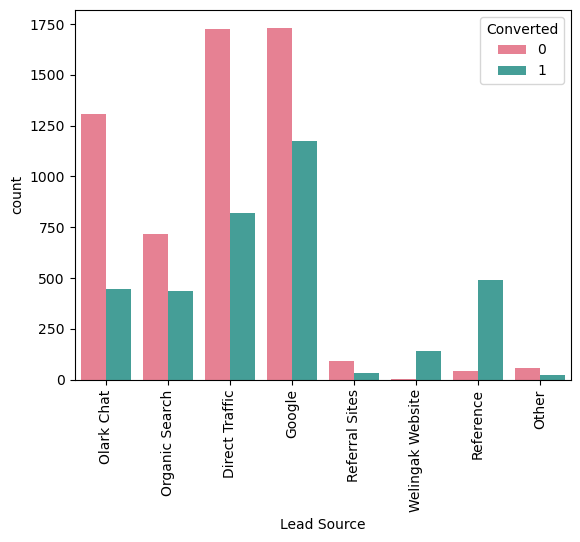

In [27]:
#plotting
sns.countplot(data=leads_data,x='Lead Source', hue='Converted', palette='husl')
plt.xticks(rotation=90)
plt.show()

#### Observation/Inference: Higher volume of leads are generated via 'Google' and 'Direct Traffic', 'Reference' category has higher conversion rate even though the volume is lesser compared to other categories. While the volume is considerably higher in 'Olark chat', conversion rate does not look promising.

In [28]:
# Confirming the above changes on the dataframe and rechecking the missing values 
round((leads_data.isnull().sum()/len(leads_data)*100),2)

Prospect ID                                 0.00
Lead Number                                 0.00
Lead Origin                                 0.00
Lead Source                                 0.00
Do Not Email                                0.00
Do Not Call                                 0.00
Converted                                   0.00
TotalVisits                                 1.48
Total Time Spent on Website                 0.00
Page Views Per Visit                        1.48
Last Activity                               1.11
What is your current occupation             0.00
Search                                      0.00
Magazine                                    0.00
Newspaper Article                           0.00
X Education Forums                          0.00
Newspaper                                   0.00
Digital Advertisement                       0.00
Through Recommendations                     0.00
Receive More Updates About Our Courses      0.00
Update me on Supply 

#### Observation/Inference: As we can see the remaining missing values are very smaller in proportion hence we will delete only the rows with these missing values

In [29]:
# Deleting the 'TotalVisits' rows with null values
leads_data = leads_data[~np.isnan(leads_data['TotalVisits'])]

In [30]:
# Confirming the above changes on the dataframe and rechecking the missing values 
round((leads_data.isnull().sum()/len(leads_data)*100),2)

Prospect ID                                 0.0
Lead Number                                 0.0
Lead Origin                                 0.0
Lead Source                                 0.0
Do Not Email                                0.0
Do Not Call                                 0.0
Converted                                   0.0
TotalVisits                                 0.0
Total Time Spent on Website                 0.0
Page Views Per Visit                        0.0
Last Activity                               0.0
What is your current occupation             0.0
Search                                      0.0
Magazine                                    0.0
Newspaper Article                           0.0
X Education Forums                          0.0
Newspaper                                   0.0
Digital Advertisement                       0.0
Through Recommendations                     0.0
Receive More Updates About Our Courses      0.0
Update me on Supply Chain Content       

In [31]:
# Now all the missing values have been dealt with
# rechecking the shape
leads_data.shape

(9103, 25)

### Step - (2.2) Additional deep dive/Cleaning of Categorical variables

In [32]:
# Checking for possible imbalance in few of these categorical variables now
# we can avoid creating dummy variables for all the below if the data is skewed or if these features are insignficant

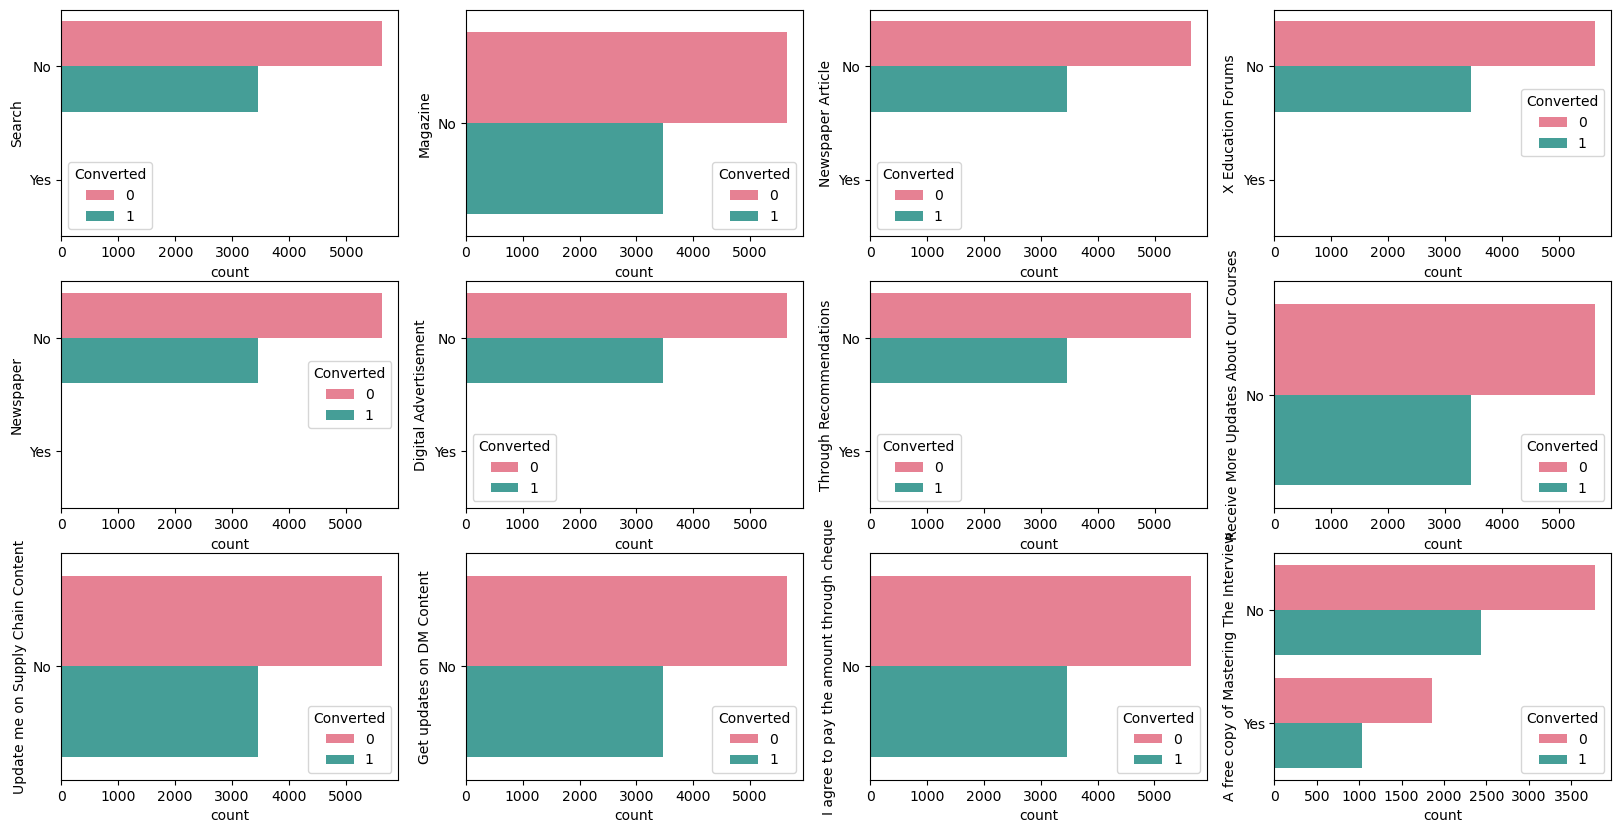

In [33]:
fig, axs =plt.subplots(3,4,figsize=(20,10))
sns.countplot(y='Search',hue='Converted',data=leads_data, ax=axs[0,0],palette=('husl'))
sns.countplot(y='Magazine',hue='Converted',data=leads_data, ax=axs[0,1],palette='husl')
sns.countplot(y='Newspaper Article',hue='Converted',data=leads_data, ax=axs[0,2],palette='husl')
sns.countplot(y='X Education Forums',hue='Converted',data=leads_data, ax=axs[0,3],palette='husl')
sns.countplot(y='Newspaper',hue='Converted',data=leads_data, ax=axs[1,0],palette='husl')
sns.countplot(y='Digital Advertisement',hue='Converted',data=leads_data, ax=axs[1,1],palette='husl')
sns.countplot(y='Through Recommendations',hue='Converted',data=leads_data, ax=axs[1,2],palette='husl')
sns.countplot(y='Receive More Updates About Our Courses',hue='Converted',data=leads_data, ax=axs[1,3],palette='husl')
sns.countplot(y='Update me on Supply Chain Content',hue='Converted',data=leads_data, ax=axs[2,0],palette='husl')
sns.countplot(y='Get updates on DM Content',hue='Converted',data=leads_data, ax=axs[2,1],palette='husl')
sns.countplot(y='I agree to pay the amount through cheque',hue='Converted',data=leads_data, ax=axs[2,2],palette='husl')
sns.countplot(y='A free copy of Mastering The Interview',hue='Converted',data=leads_data, ax=axs[2,3],palette='husl')

plt.show()

#### Observation/Inference: As we can see from the above plot, conversion rate is highly skewed towards 'No', in other words Data is highly imbalanced for all the above categorical variables except 'A free copy of Mastering The Interview' feature. We can drop these features.

In [34]:
dropping_cols = (['Search', 'Magazine',
       'Newspaper Article', 'X Education Forums', 'Newspaper',
       'Digital Advertisement', 'Through Recommendations',
       'Receive More Updates About Our Courses',
       'Update me on Supply Chain Content', 'Get updates on DM Content',
        'I agree to pay the amount through cheque',])

# droppping the above listed features

leads_data = leads_data.drop(dropping_cols,1)

In [35]:
leads_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9103 entries, 0 to 9239
Data columns (total 14 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   Prospect ID                             9103 non-null   object 
 1   Lead Number                             9103 non-null   int64  
 2   Lead Origin                             9103 non-null   object 
 3   Lead Source                             9103 non-null   object 
 4   Do Not Email                            9103 non-null   object 
 5   Do Not Call                             9103 non-null   object 
 6   Converted                               9103 non-null   int64  
 7   TotalVisits                             9103 non-null   float64
 8   Total Time Spent on Website             9103 non-null   int64  
 9   Page Views Per Visit                    9103 non-null   float64
 10  Last Activity                           9103 non-null   obje

In [36]:
# Performing bivariate analysis on 'Lead origin'

leads_data['Lead Origin'].value_counts(normalize=100)

Landing Page Submission    0.536746
API                        0.393057
Lead Add Form              0.066791
Lead Import                0.003405
Name: Lead Origin, dtype: float64

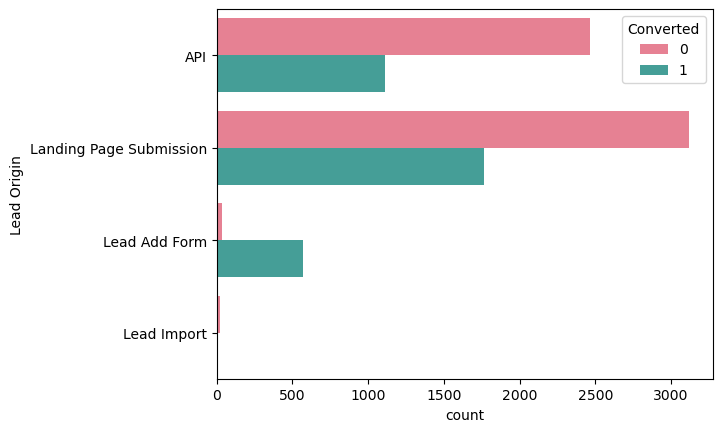

In [37]:
#plotting 

sns.countplot(y=leads_data['Lead Origin'], hue=leads_data['Converted'], palette='husl')
plt.show()

#### Observation/Inference: 
    -'Landing Page Submission' tops the charts with higher volume and higher conversion rate compared to other categories. We can also observe that 'Lead Add Form' is having higher conversion rate with a very less volume. 
    - It is noticable that we have a lot of room for improvement in 'Landing Page Submission' and 'API' with regards to lead conversion.

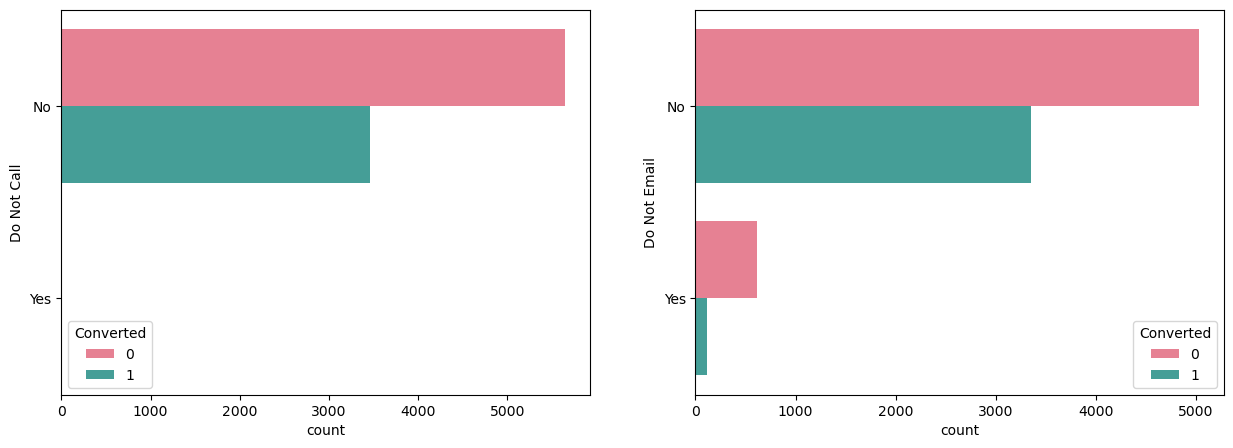

In [38]:
# Lets consider both 'Do not Email' and 'Do not Call' features to look at the data spread and conversion rate

fig, axs = plt.subplots(1,2, figsize= (15,5))

sns.countplot(y='Do Not Call', hue='Converted', palette='husl', ax = axs[0], data=leads_data)
sns.countplot(y='Do Not Email', hue='Converted', palette='husl', ax= axs[1], data=leads_data)

plt.show()

#### Observation/Inference: 'Do not call' feature is totally imbalanced, hence we will be dropping the same. 


In [39]:
leads_data.drop(['Do Not Call'],1,inplace=True)


In [40]:
# Confirming the above changes on the dataframe
round((leads_data.isnull().sum()/len(leads_data)*100),2)

Prospect ID                               0.0
Lead Number                               0.0
Lead Origin                               0.0
Lead Source                               0.0
Do Not Email                              0.0
Converted                                 0.0
TotalVisits                               0.0
Total Time Spent on Website               0.0
Page Views Per Visit                      0.0
Last Activity                             0.0
What is your current occupation           0.0
A free copy of Mastering The Interview    0.0
Last Notable Activity                     0.0
dtype: float64

In [41]:
# Dropping the 'Prospect ID','Lead Number' as they do not hold any reliable information for the model at the moment
leads_data.drop(['Prospect ID','Lead Number'],1,inplace=True)

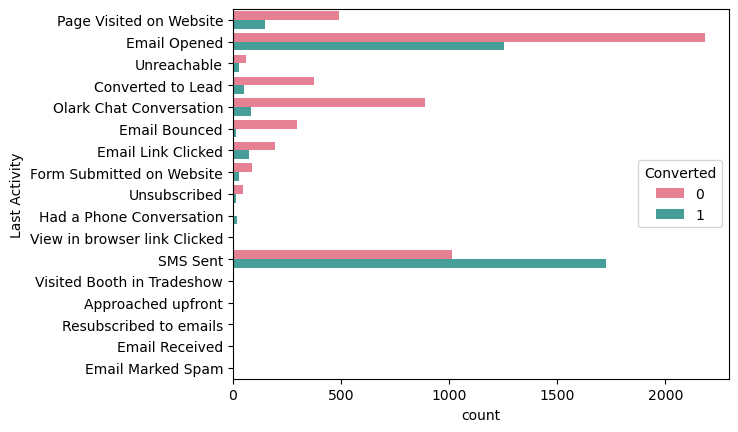

In [42]:
#plotting
sns.countplot(y=leads_data['Last Activity'], hue=leads_data['Converted'], palette='husl')
plt.show()

#### Observation/Inference: while 'Email Opened' tops the chart with high volume but the conversion rate is not that impressive, we also observe higher conversion rate in 'SMS Sent' with very volume leads volume and the opposite is true incase of 'Olark chat conversation'.

We will go ahead and club the lower categories so these will help us keep the features simpler while creating dummy variables in future.

In [43]:
leads_data['Last Activity'] = leads_data['Last Activity'].replace( ['Unreachable','Unsubscribed',
                                                           'Had a Phone Conversation', 
                                                           'Approached upfront',
                                                            'View in browser link Clicked',       
                                                            'Email Marked Spam',                  
                                                            'Email Received','Resubscribed to emails',
                                                             'Visited Booth in Tradeshow',
                                                            'Form Submitted on Website','Email Bounced',
                                                            'Email Link Clicked','Converted to Lead'], 'Others')

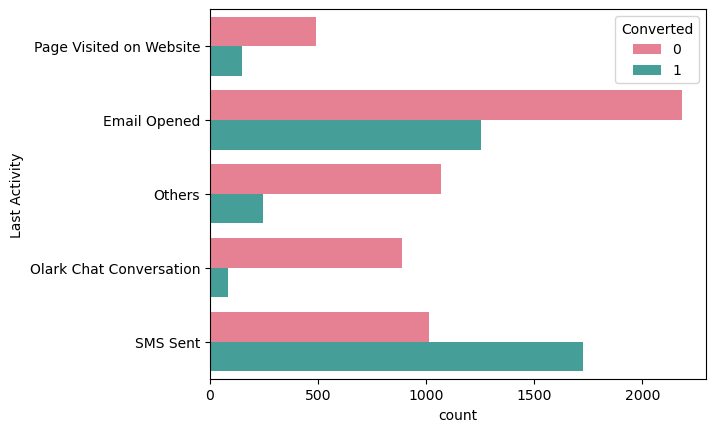

In [44]:
#plotting
sns.countplot(y=leads_data['Last Activity'], hue=leads_data['Converted'], palette='husl')
plt.show()

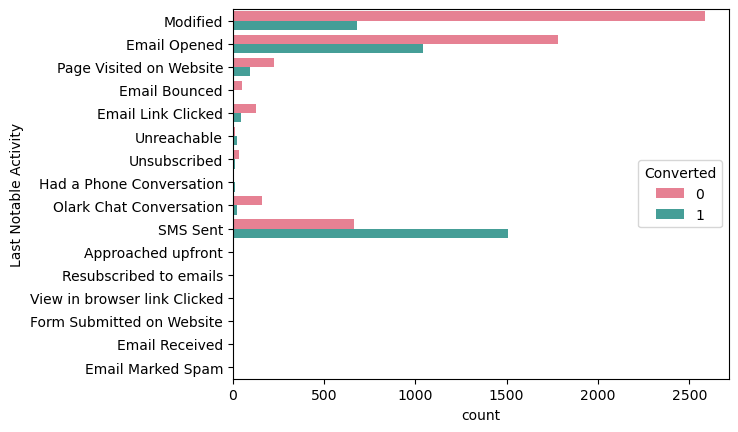

In [45]:
#plotting Last Notable activity data
sns.countplot(y=leads_data['Last Notable Activity'], hue=leads_data['Converted'], palette='husl')
plt.show()

#### Observation/Inference: We do not see a good conversion rate for 'Modified' and 'Email Opened' despite of having higher leads volume. 'SMS Sent' however is managed to have far better conversion rate with lesser volume compared to forementioned categories.

We will follow the same process of creating a new category for lowe data points

In [46]:
leads_data['Last Notable Activity'] = leads_data['Last Notable Activity'].replace( ['Had a Phone Conversation',
                                                                       'Email Marked Spam',
                                                                         'Unreachable',
                                                                         'Unsubscribed',
                                                                         'Email Bounced',                                                                    
                                                                       'Resubscribed to emails',
                                                                       'View in browser link Clicked',
                                                                       'Approached upfront', 
                                                                       'Form Submitted on Website', 
                                                                       'Email Received','Email Link Clicked',
                                                                        'Page Visited on Website'], 'Others')

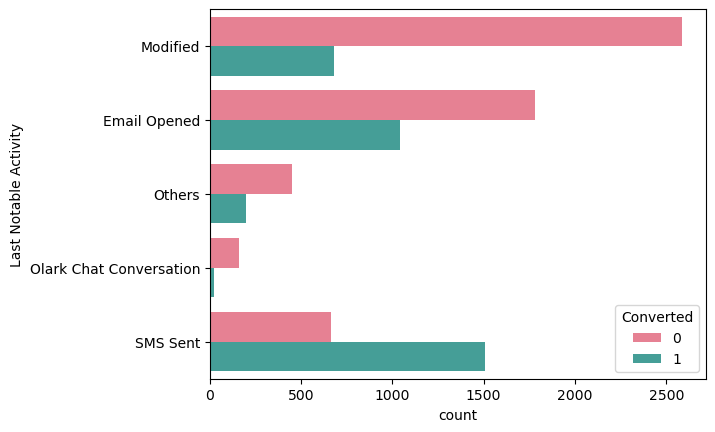

In [47]:
#re-plotting Last Notable activity data
sns.countplot(y=leads_data['Last Notable Activity'], hue=leads_data['Converted'], palette='husl')
plt.show()

In [48]:
leads_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9103 entries, 0 to 9239
Data columns (total 11 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   Lead Origin                             9103 non-null   object 
 1   Lead Source                             9103 non-null   object 
 2   Do Not Email                            9103 non-null   object 
 3   Converted                               9103 non-null   int64  
 4   TotalVisits                             9103 non-null   float64
 5   Total Time Spent on Website             9103 non-null   int64  
 6   Page Views Per Visit                    9103 non-null   float64
 7   Last Activity                           9103 non-null   object 
 8   What is your current occupation         9103 non-null   object 
 9   A free copy of Mastering The Interview  9103 non-null   object 
 10  Last Notable Activity                   9103 non-null   obje

In [49]:
# Now the features look to be in much better shape. let's move on to numerical variables

### Step - (2.3) Outlier treatment

In [50]:
# Let's look at the numerical variables to check for any outliers

leads_data.describe(percentiles=[0.05,0.25,0.50,0.75,0.90,0.95,0.99])

,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit
count,9103.000000,9103.000000,9103.000000,9103.000000
mean,0.380204,3.445238,481.350104,2.362820
std,0.485464,4.854853,545.066142,2.161418
min,0.000000,0.000000,0.000000,0.000000
5%,0.000000,0.000000,0.000000,0.000000
25%,0.000000,1.000000,9.000000,1.000000
50%,0.000000,3.000000,244.000000,2.000000
75%,1.000000,5.000000,919.500000,3.000000
90%,1.000000,7.000000,1372.000000,5.000000
95%,1.000000,10.000000,1556.900000,6.000000


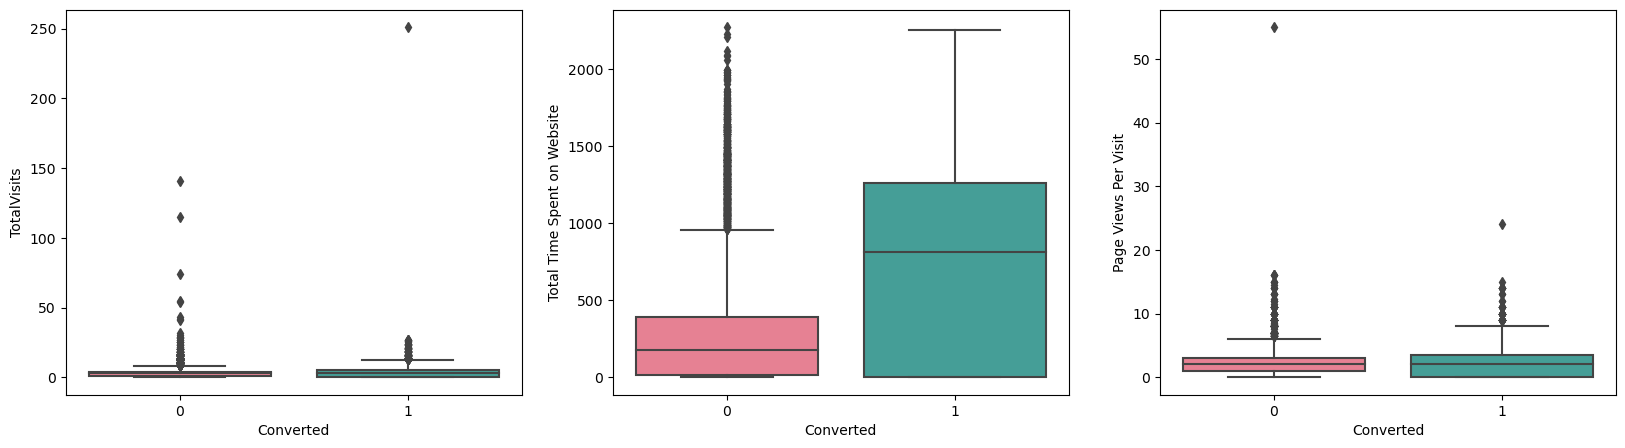

In [51]:
# we can observe the outliers, lets plot them using a box plot

fig, axs = plt.subplots(1,3,figsize = (20,5))
sns.boxplot(y = 'TotalVisits', x = 'Converted', data = leads_data,ax=axs[0],palette='husl')
sns.boxplot(y = 'Total Time Spent on Website', x = 'Converted', data = leads_data,ax=axs[1], palette='husl')
sns.boxplot(y = 'Page Views Per Visit', x = 'Converted', data = leads_data,ax=axs[2], palette='husl')
plt.show()

#### Observation: We can observe data points above the 'max' line of boxplots for all the above, let's remove these outliers one by one.

In [52]:
## Treating the outliers which are above Q3 and below Q1 for 'TotalVisits', Removing anything above 0.99 and 0.01 below percentile.

Q3_outlier = leads_data.TotalVisits.quantile(0.99)

leads_data = leads_data[(leads_data.TotalVisits <= Q3_outlier)]

Q1_outlier = leads_data.TotalVisits.quantile(0.01)

leads_data = leads_data[(leads_data.TotalVisits>= Q1_outlier)]

In [53]:
leads_data['TotalVisits'].describe(percentiles=[0.05,0.25,0.50,0.75,0.90,0.95,0.99])

count    9020.000000
mean        3.206984
std         2.990108
min         0.000000
5%          0.000000
25%         1.000000
50%         3.000000
75%         5.000000
90%         7.000000
95%         9.000000
99%        13.810000
max        17.000000
Name: TotalVisits, dtype: float64

In [54]:
## Treating the outliers which are above Q3 and below Q1 for 'Page Views Per Visit', Removing anything above 0.99 and 0.01 below percentile.

Q3_outlier = leads_data['Page Views Per Visit'].quantile(0.99)

leads_data = leads_data[(leads_data['Page Views Per Visit'] <= Q3_outlier)]

Q1_outlier = leads_data['Page Views Per Visit'].quantile(0.01)

leads_data = leads_data[(leads_data['Page Views Per Visit']>= Q1_outlier)]

In [55]:
leads_data['Page Views Per Visit'].describe(percentiles=[0.05,0.25,0.50,0.75,0.90,0.95,0.99])

count    8953.000000
mean        2.266858
std         1.895221
min         0.000000
5%          0.000000
25%         1.000000
50%         2.000000
75%         3.000000
90%         5.000000
95%         6.000000
99%         8.000000
max         9.000000
Name: Page Views Per Visit, dtype: float64

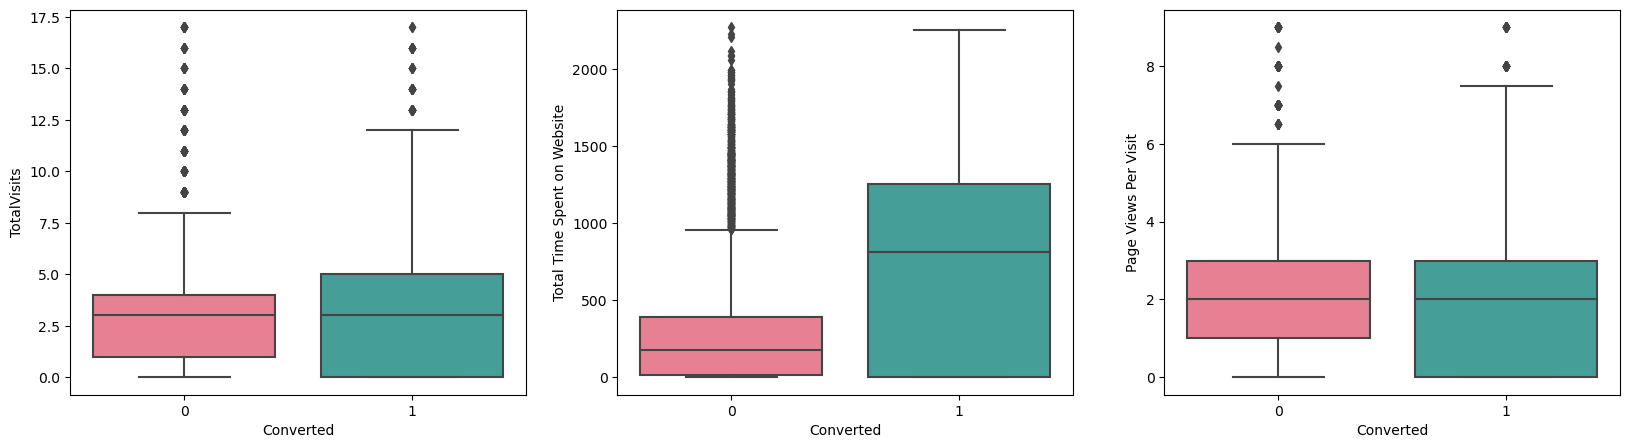

In [56]:
fig, axs = plt.subplots(1,3,figsize = (20,5))
sns.boxplot(y = 'TotalVisits', x = 'Converted', data = leads_data,ax=axs[0],palette='husl')
sns.boxplot(y = 'Total Time Spent on Website', x = 'Converted', data = leads_data,ax=axs[1], palette='husl')
sns.boxplot(y = 'Page Views Per Visit', x = 'Converted', data = leads_data,ax=axs[2], palette='husl')
plt.show()

#### Observation/Inference: 
- For 'Total Time Spent on Website' we can clearly witness that the conversion rate is higher for those who tend to spend more     time on the website.
- However, for the other two varirables the median looks to be very close in both cases of conversions.

In [57]:
leads_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8953 entries, 0 to 9239
Data columns (total 11 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   Lead Origin                             8953 non-null   object 
 1   Lead Source                             8953 non-null   object 
 2   Do Not Email                            8953 non-null   object 
 3   Converted                               8953 non-null   int64  
 4   TotalVisits                             8953 non-null   float64
 5   Total Time Spent on Website             8953 non-null   int64  
 6   Page Views Per Visit                    8953 non-null   float64
 7   Last Activity                           8953 non-null   object 
 8   What is your current occupation         8953 non-null   object 
 9   A free copy of Mastering The Interview  8953 non-null   object 
 10  Last Notable Activity                   8953 non-null   obje

In [58]:
#### Now's lets keep the overall conversion rate for our reference here

conversion_rate = round((sum(leads_data['Converted']/len(leads_data['Converted']))*100),2)
print('Conversion_rate is - ', conversion_rate, '%')

Conversion_rate is -  37.92 %


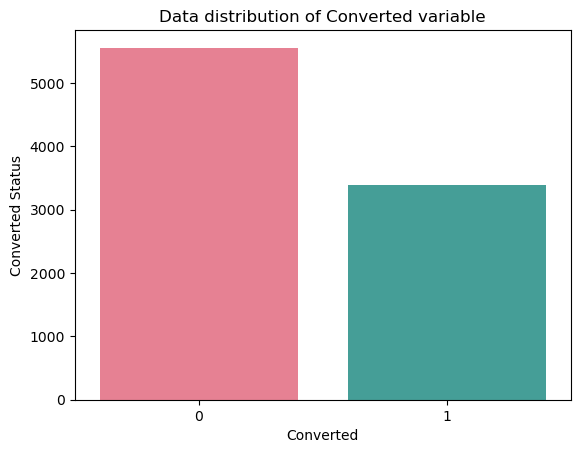

In [59]:
#plotting 'Converted' variable's distribution

sns.countplot(leads_data['Converted'], palette = 'husl')
plt.ylabel('Converted Status')
plt.title('Data distribution of Converted variable')
plt.show()

### Step (3) Data Preparation

    As we have completed data cleaning we can now proceed with creating dummy variables, Scaling the data etc.,


In [60]:
#Let's consider all the categorical features so we can create dummy variables for all

categorical_feat= leads_data.select_dtypes(include='object').columns

categorical_feat

Index(['Lead Origin', 'Lead Source', 'Do Not Email', 'Last Activity',
       'What is your current occupation',
       'A free copy of Mastering The Interview', 'Last Notable Activity'],
      dtype='object')

In [61]:
#lets remove 'Do not Email' and 'A free copy of Mastering The Interview'

categorical_feat=categorical_feat.drop(['Do Not Email','A free copy of Mastering The Interview'])

### Step - (3.1) Creating Dummy variables

In [62]:
d1 = pd.get_dummies(leads_data[['Lead Origin']],prefix = 'Lead Origin')
leads_data = pd.concat([leads_data,d1],1)

d2 = pd.get_dummies(leads_data['Lead Source'], prefix = 'Lead Source')
leads_data = pd.concat([leads_data,d2],1)

d3 = pd.get_dummies(leads_data['Last Activity'], prefix = 'Last Activity')
d3= d3.drop(['Last Activity_Others'],1)
leads_data = pd.concat([leads_data,d3],1)

d4 = pd.get_dummies(leads_data['What is your current occupation'], prefix = 'What is your current occupation')
d4= d4.drop(['What is your current occupation_Other'],1)
leads_data = pd.concat([leads_data,d4],1)

d5 = pd.get_dummies(leads_data['Last Notable Activity'], prefix = 'Last Notable Activity')
d5 = d5.drop(['Last Notable Activity_Others'],1)
leads_data = pd.concat([leads_data,d5],1)

In [63]:
leads_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8953 entries, 0 to 9239
Data columns (total 34 columns):
 #   Column                                                Non-Null Count  Dtype  
---  ------                                                --------------  -----  
 0   Lead Origin                                           8953 non-null   object 
 1   Lead Source                                           8953 non-null   object 
 2   Do Not Email                                          8953 non-null   object 
 3   Converted                                             8953 non-null   int64  
 4   TotalVisits                                           8953 non-null   float64
 5   Total Time Spent on Website                           8953 non-null   int64  
 6   Page Views Per Visit                                  8953 non-null   float64
 7   Last Activity                                         8953 non-null   object 
 8   What is your current occupation                       8953

In [64]:
# dealing with yes no category variables

var_list = ['Do Not Email', 'A free copy of Mastering The Interview']

# creating a map function

def binary_map(x):
    return x.map({'Yes':1,'No':0})

# applying the above function to var_list

leads_data[var_list] = leads_data[var_list].apply(binary_map)

In [65]:
leads_data.head()

,Lead Origin,Lead Source,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,What is your current occupation,A free copy of Mastering The Interview,...,Last Activity_Olark Chat Conversation,Last Activity_Page Visited on Website,Last Activity_SMS Sent,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,Last Notable Activity_Email Opened,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_SMS Sent
0,API,Olark Chat,0,0,0.0,0,0.0,Page Visited on Website,Unemployed,0,...,0,1,0,0,1,0,0,1,0,0
1,API,Organic Search,0,0,5.0,674,2.5,Email Opened,Unemployed,0,...,0,0,0,0,1,0,1,0,0,0
2,Landing Page Submission,Direct Traffic,0,1,2.0,1532,2.0,Email Opened,Student,1,...,0,0,0,1,0,0,1,0,0,0
3,Landing Page Submission,Direct Traffic,0,0,1.0,305,1.0,Others,Unemployed,0,...,0,0,0,0,1,0,0,1,0,0
4,Landing Page Submission,Google,0,1,2.0,1428,1.0,Others,Unemployed,0,...,0,0,0,0,1,0,0,1,0,0


In [66]:
#dropping repeated features after creating dummy

categorical_feat

Index(['Lead Origin', 'Lead Source', 'Last Activity',
       'What is your current occupation', 'Last Notable Activity'],
      dtype='object')

In [67]:
leads_data.drop(categorical_feat, 1, inplace=True)

In [68]:
leads_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8953 entries, 0 to 9239
Data columns (total 29 columns):
 #   Column                                                Non-Null Count  Dtype  
---  ------                                                --------------  -----  
 0   Do Not Email                                          8953 non-null   int64  
 1   Converted                                             8953 non-null   int64  
 2   TotalVisits                                           8953 non-null   float64
 3   Total Time Spent on Website                           8953 non-null   int64  
 4   Page Views Per Visit                                  8953 non-null   float64
 5   A free copy of Mastering The Interview                8953 non-null   int64  
 6   Lead Origin_API                                       8953 non-null   uint8  
 7   Lead Origin_Landing Page Submission                   8953 non-null   uint8  
 8   Lead Origin_Lead Add Form                             8953

### Step - (3.2)  Splitting the data into train and test datasets

In [69]:
# assigning x, y variables

X = leads_data.drop('Converted', axis =1)

X.head()

,Do Not Email,TotalVisits,Total Time Spent on Website,Page Views Per Visit,A free copy of Mastering The Interview,Lead Origin_API,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Direct Traffic,...,Last Activity_Olark Chat Conversation,Last Activity_Page Visited on Website,Last Activity_SMS Sent,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,Last Notable Activity_Email Opened,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_SMS Sent
0,0,0.0,0,0.0,0,1,0,0,0,0,...,0,1,0,0,1,0,0,1,0,0
1,0,5.0,674,2.5,0,1,0,0,0,0,...,0,0,0,0,1,0,1,0,0,0
2,0,2.0,1532,2.0,1,0,1,0,0,1,...,0,0,0,1,0,0,1,0,0,0
3,0,1.0,305,1.0,0,0,1,0,0,1,...,0,0,0,0,1,0,0,1,0,0
4,0,2.0,1428,1.0,0,0,1,0,0,0,...,0,0,0,0,1,0,0,1,0,0


In [70]:
y = leads_data['Converted']

y.head()

0    0
1    0
2    1
3    0
4    1
Name: Converted, dtype: int64

In [71]:
# Splitting the data into train and test

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7,random_state=100)

### Step - (3.2) Feature Scaling

In [72]:
#Instantiating Stdscaler

scaler = StandardScaler()

X_train[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']] = scaler.fit_transform(X_train[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']])

X_train.head()

,Do Not Email,TotalVisits,Total Time Spent on Website,Page Views Per Visit,A free copy of Mastering The Interview,Lead Origin_API,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Direct Traffic,...,Last Activity_Olark Chat Conversation,Last Activity_Page Visited on Website,Last Activity_SMS Sent,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,Last Notable Activity_Email Opened,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_SMS Sent
9196,0,0.668862,1.848117,1.455819,0,0,1,0,0,0,...,0,0,1,0,1,0,0,0,0,1
4696,0,-0.030697,-0.037832,0.399961,0,0,1,0,0,1,...,0,0,1,0,1,0,0,0,0,1
3274,0,0.319082,-0.642138,-0.127967,0,0,1,0,0,0,...,0,0,1,0,0,0,0,0,0,1
2164,0,-0.380477,-0.154676,-0.127967,0,1,0,0,0,0,...,1,0,0,0,1,0,0,1,0,0
1667,0,0.319082,1.258415,-0.481679,0,1,0,0,0,0,...,0,0,0,0,1,0,1,0,0,0


### Step - (3.3) Checking for highly Correlated variables

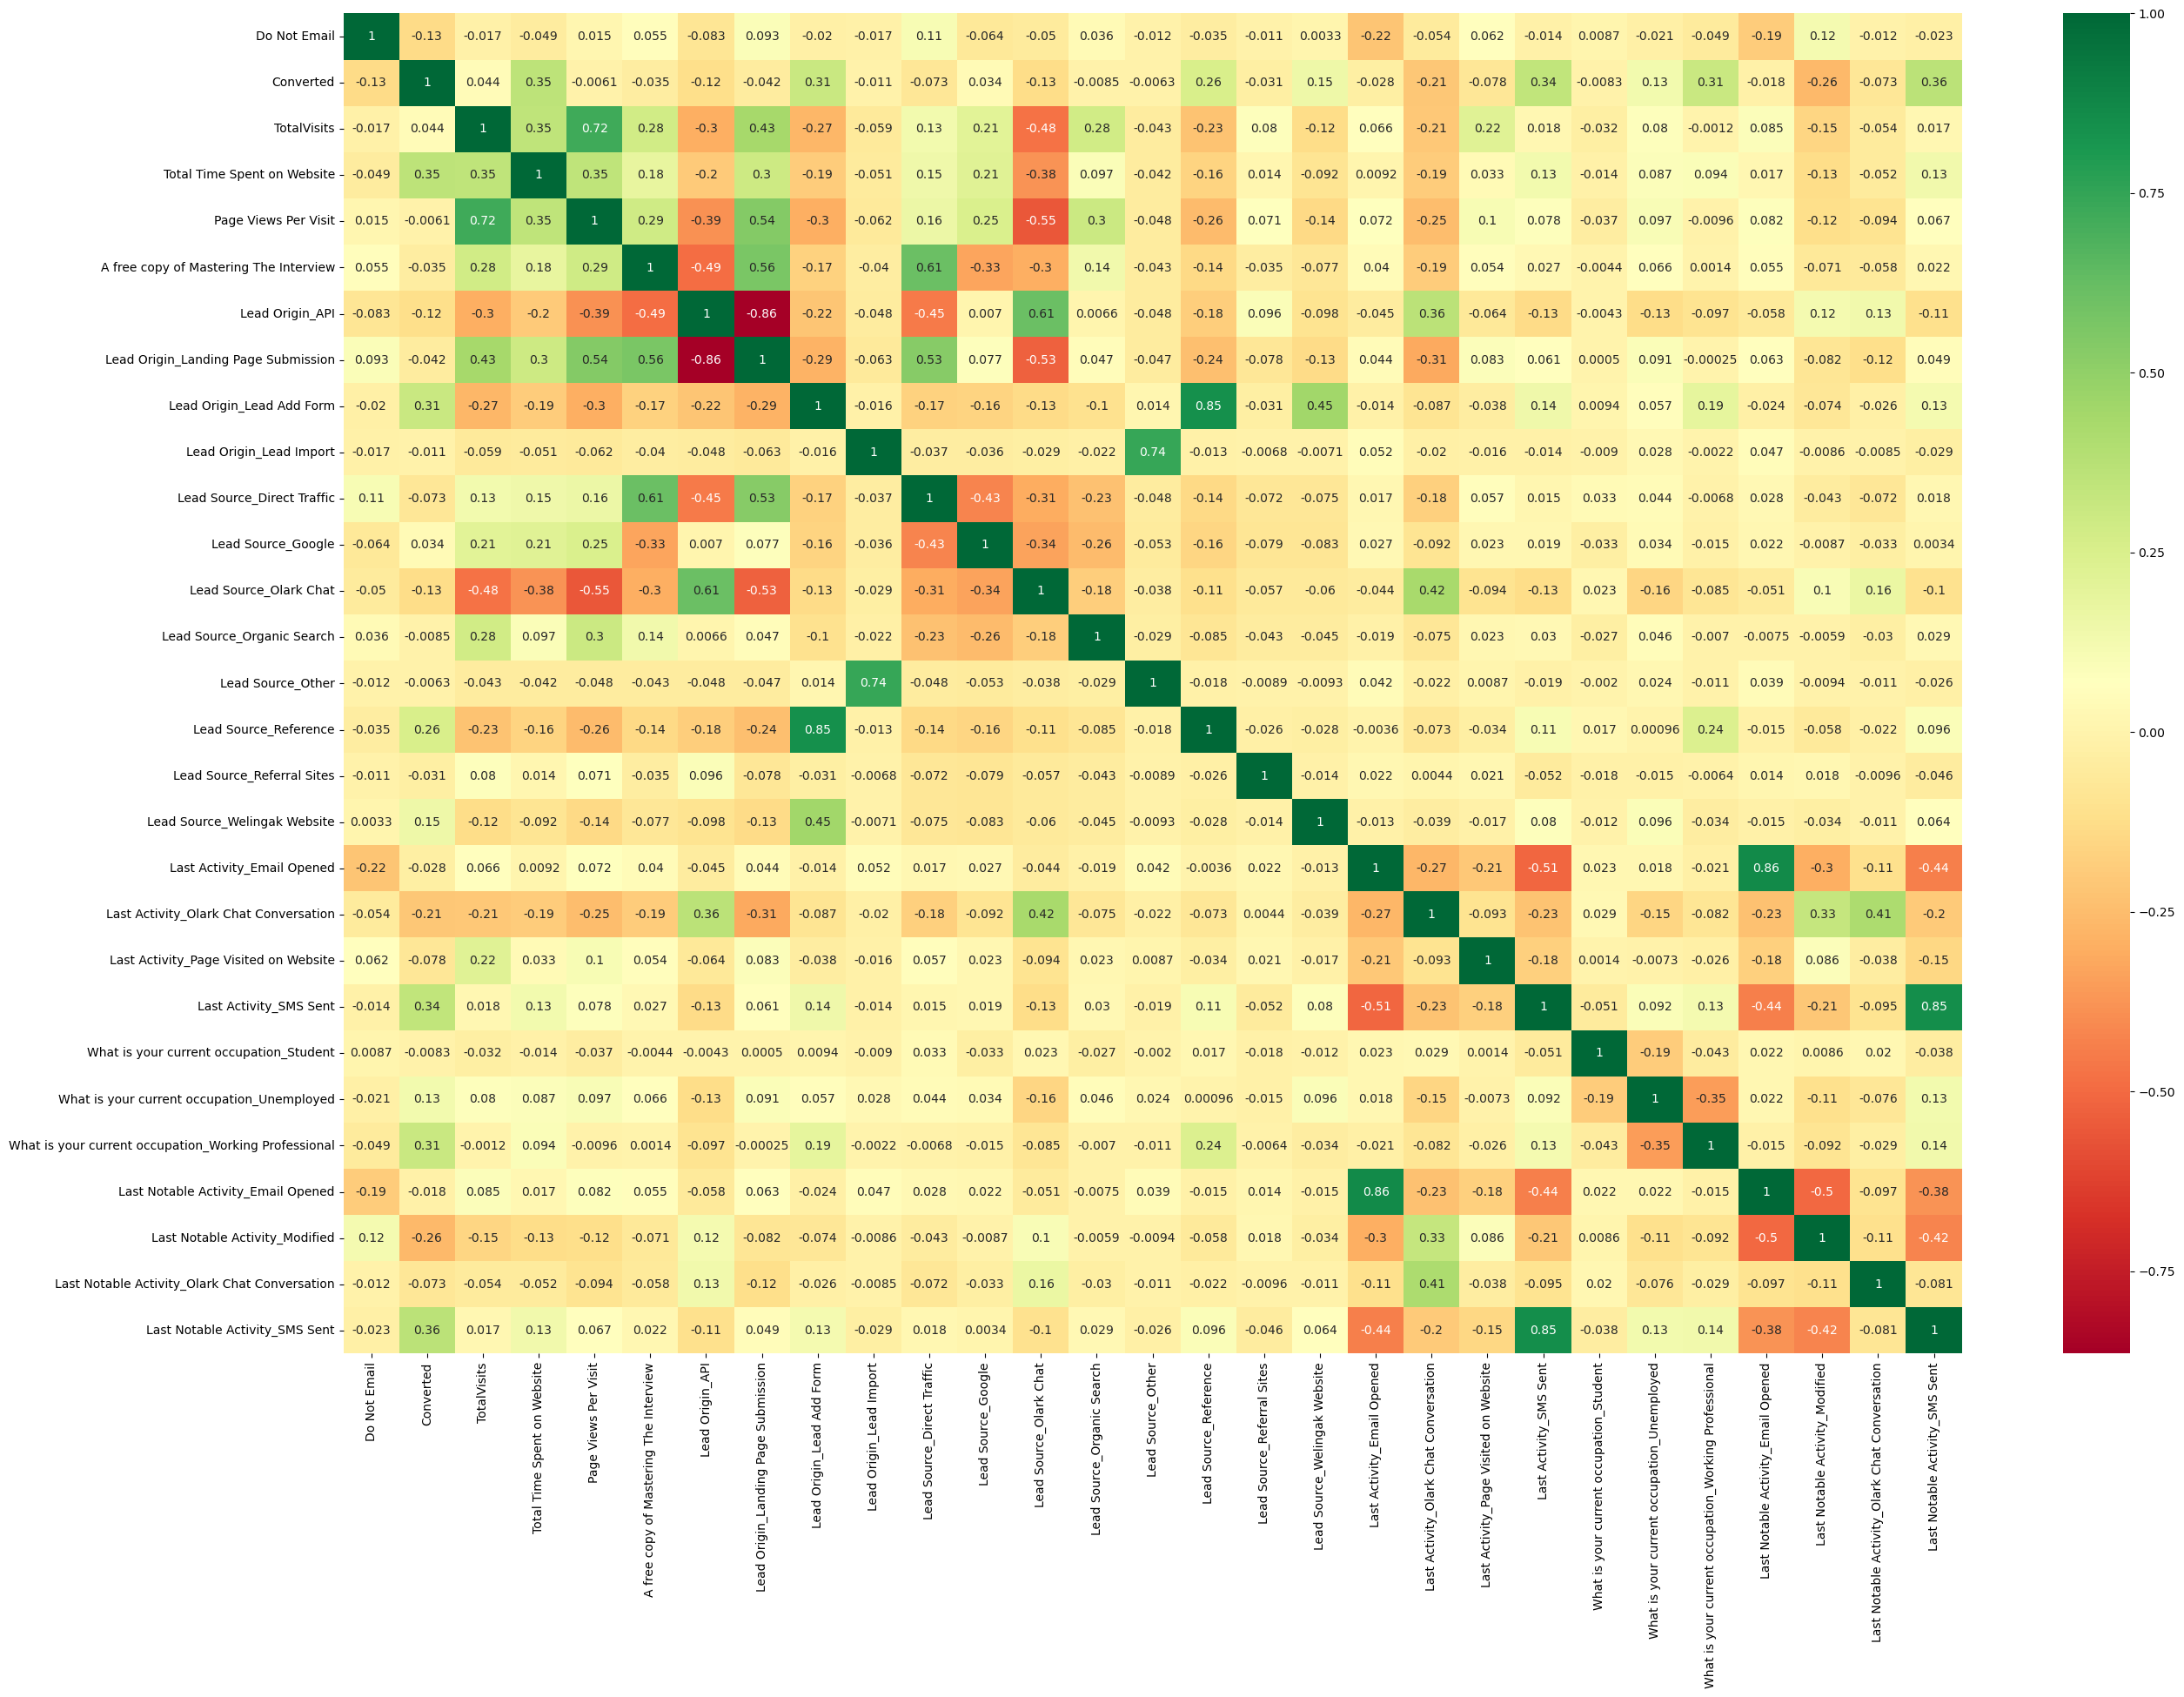

In [73]:
# Let's see the correlation matrix 
plt.figure(figsize= (30,20))
sns.heatmap(leads_data.corr(), annot=True, cmap= 'RdYlGn')
plt.show()

In [74]:
# Dropping highly correlated features in both test and train sets
X_train = X_train.drop(['Lead Origin_API','Lead Origin_Lead Add Form','Lead Source_Other','Last Notable Activity_SMS Sent', 
'Last Notable Activity_Email Opened'],1)
X_test = X_test.drop(['Lead Origin_API','Lead Origin_Lead Add Form','Lead Source_Other','Last Notable Activity_SMS Sent', 
'Last Notable Activity_Email Opened'],1)

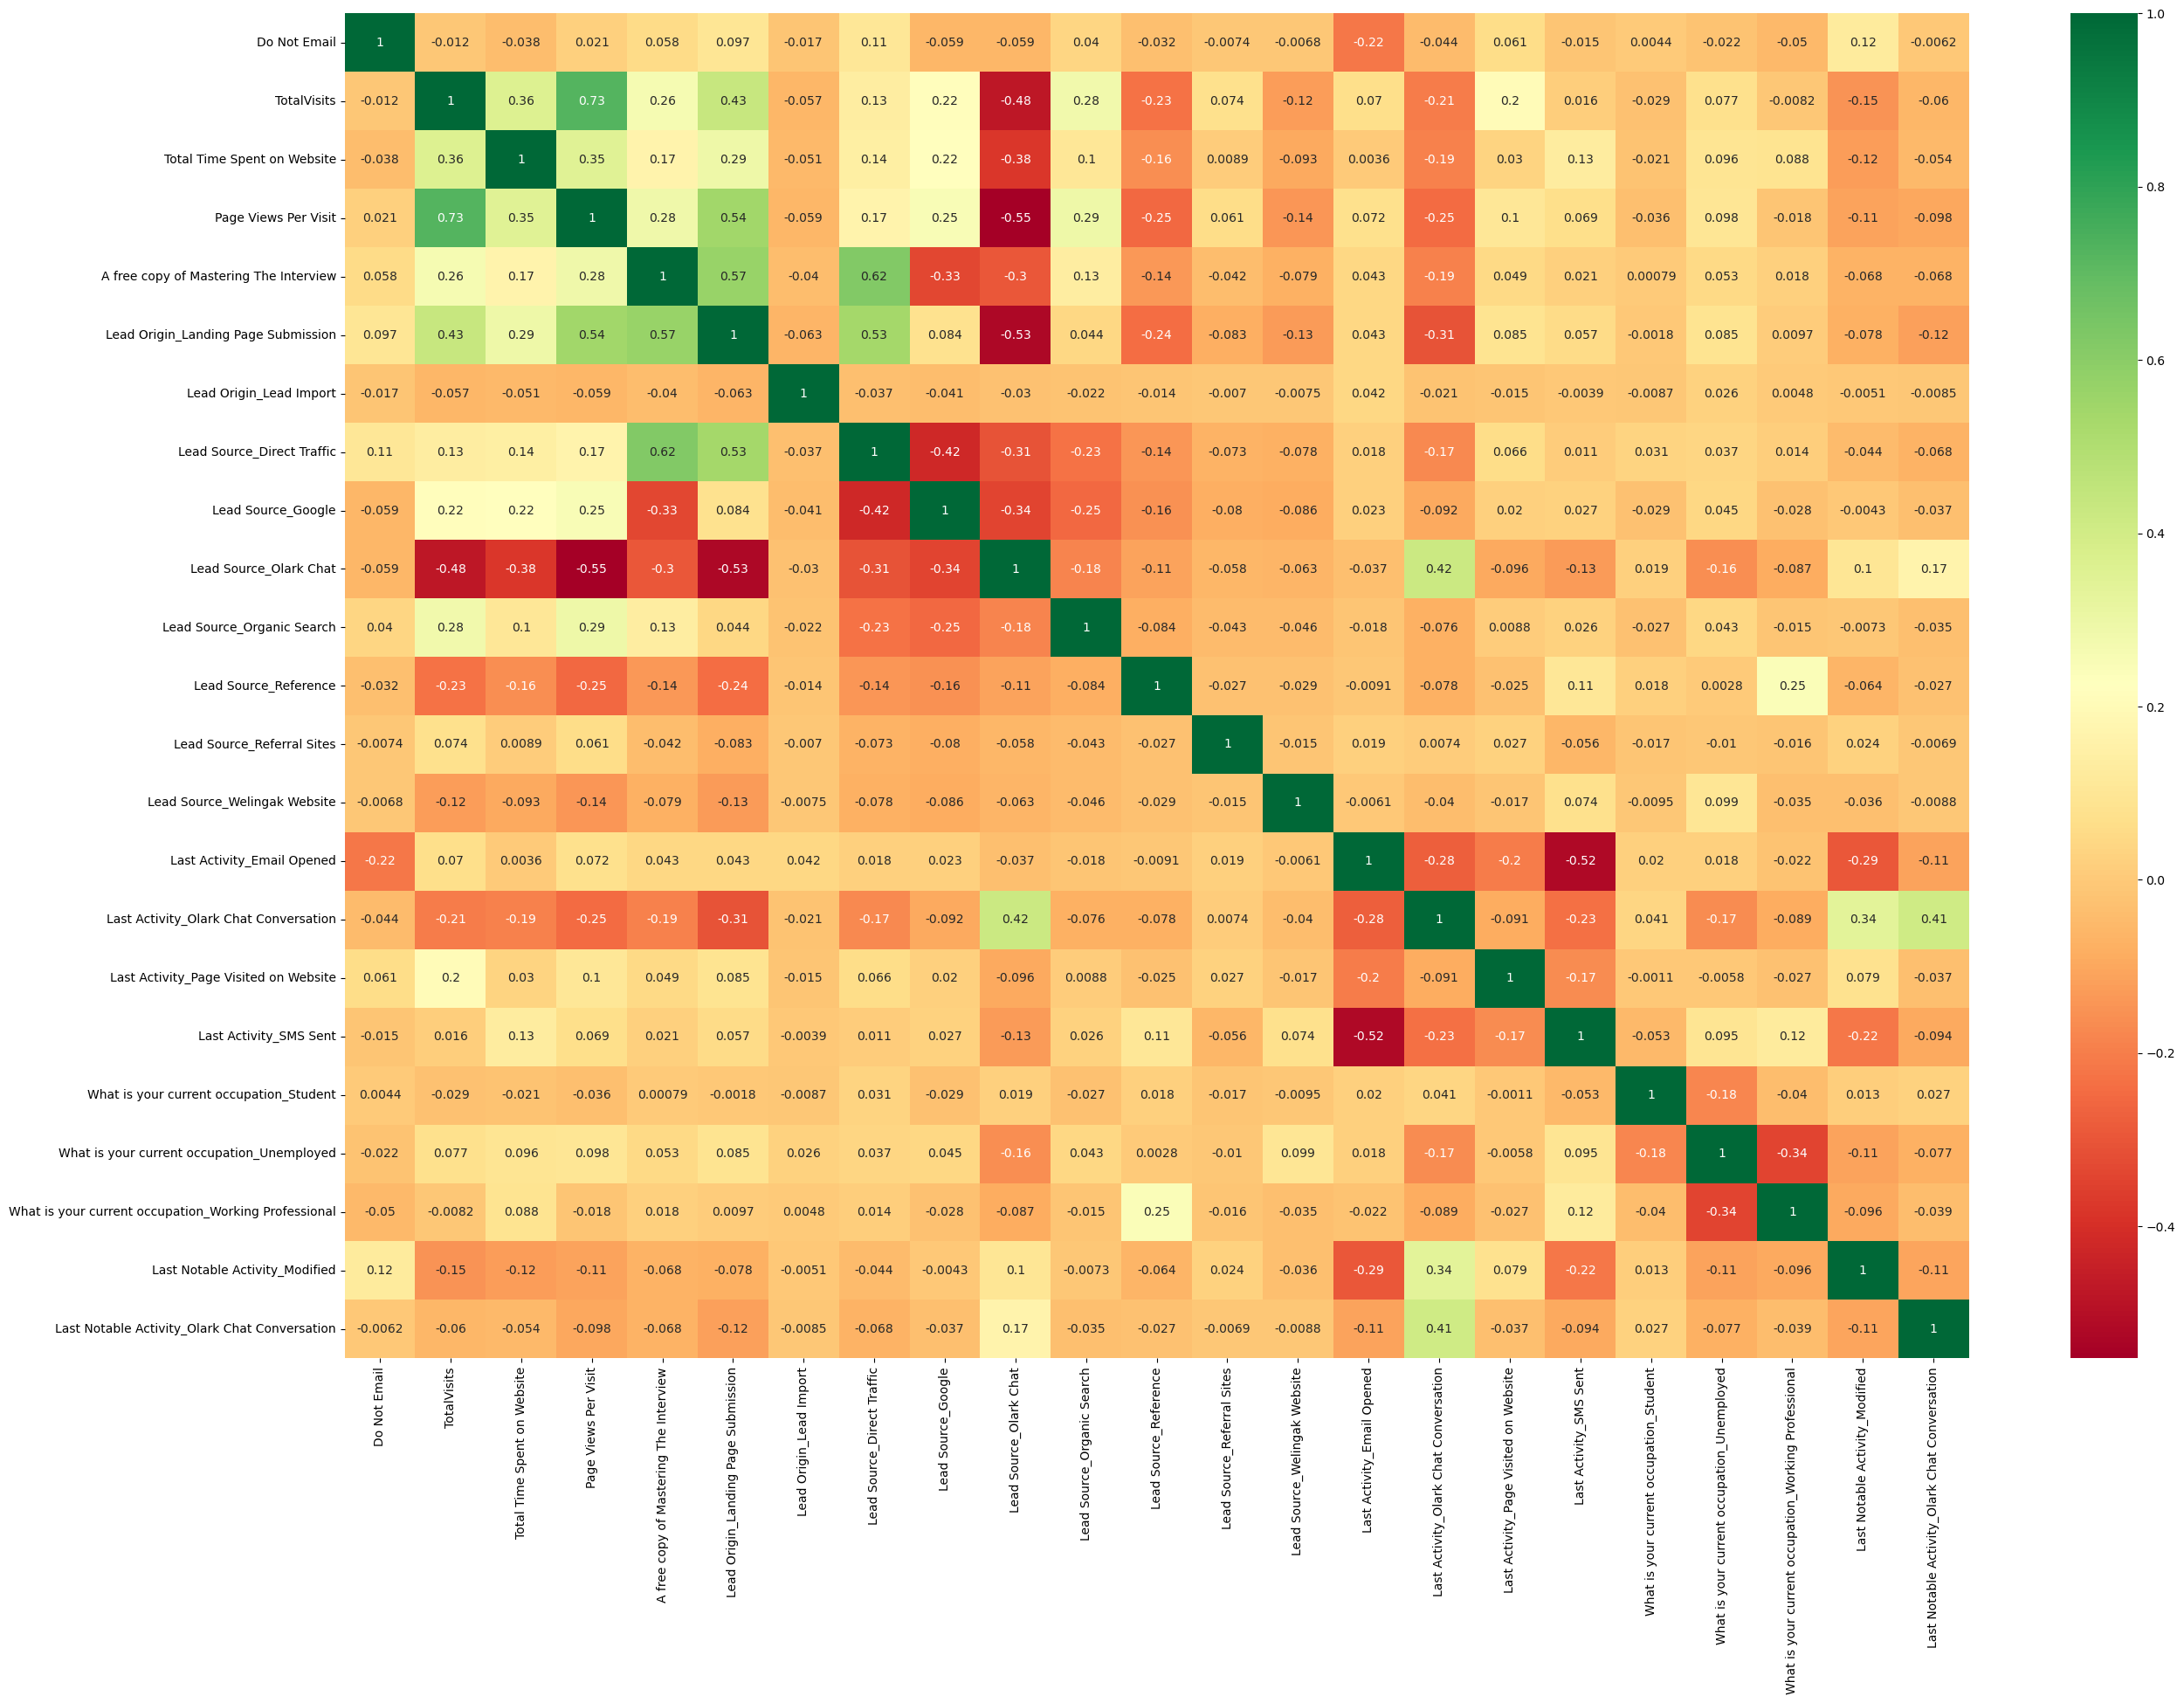

In [75]:
# Let's see the correlation matrix 
plt.figure(figsize= (30,20))
sns.heatmap(X_train.corr(), annot=True, cmap= 'RdYlGn')
plt.show()

### Step - (4) Model Building

In [76]:
import statsmodels.api as sm

In [77]:
# Running first training model

logm1 = sm.GLM(y_train,(sm.add_constant(X_train)), family=sm.families.Binomial())

logm1.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6267
Model:                            GLM   Df Residuals:                     6243
Model Family:                Binomial   Df Model:                           23
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2530.2
Date:                Tue, 20 Jun 2023   Deviance:                       5060.4
Time:                        14:42:16   Pearson chi2:                 6.29e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.4062
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -0.8975      0.619     -1.449      0.147      -2.112       0.317
Do Not Email                                            -1.0791      0.176     -6.141      0.000      -1.424      -0.735
TotalVisits                                              0.2484      0.052      4.805      0.000       0.147       0.350
Total Time Spent on Website                              1.0484      0.041     25.870      0.000       0.969       1.128
Page Views Per Visit                                    -0.2209      0.058     -3.830      0.000      -0.334      -0.108
A free copy of Mastering The Interview                  -0.0908      0.110     -0.825      0.410      -0.307       0.125
Lead Origin_Landing Page Submission                     -0.2442      0.108     -2.256      0.024      -0.456      -0.032
Lead Origin_Lead Import                                 -0.3838      0.773     -0.496      0.620      -1.899       1.131
Lead Source_Direct Traffic                              -1.3242      0.608     -2.177      0.029      -2.516      -0.132
Lead Source_Google                                      -0.9587      0.604     -1.588      0.112      -2.142       0.224
Lead Source_Olark Chat                                  -0.0738      0.610     -0.121      0.904      -1.269       1.122
Lead Source_Organic Search                              -1.1387      0.612     -1.860      0.063      -2.338       0.061
Lead Source_Reference                                    2.6408      0.656      4.024      0.000       1.355       3.927
Lead Source_Referral Sites                              -1.3599      0.687     -1.979      0.048      -2.707      -0.013
Lead Source_Welingak Website                             4.7570      1.180      4.033      0.000       2.445       7.069
Last Activity_Email Opened                               0.1560      0.131      1.194      0.232      -0.100       0.412
Last Activity_Olark Chat Conversation                   -0.8935      0.216     -4.137      0.000      -1.317      -0.470
Last Activity_Page Visited on Website                   -0.2896      0.193     -1.500      0.134      -0.668       0.089
Last Activity_SMS Sent                                   1.3782      0.130     10.583      0.000       1.123       1.633
What is your current occupation_Student                  1.1817      0.246      4.810      0.000       0.700       1.663
What is your current occupation_Unemployed               1.2101      0.088     13.784      0.000       1.038       1.382
What is your current occupation_Working Professional     3.6873      0.209     17.628      0.000       3.277       4.097
Last Notable Activity_Modified                          -0

### Step - (4.1) : Feature Selection Using RFE

In [78]:
from sklearn.linear_model import LogisticRegression

In [79]:
logreg = LogisticRegression() #estimator

In [80]:
from sklearn.feature_selection import RFE

In [81]:
rfe = RFE(logreg,step=20)                  
rfe = rfe.fit(X_train, y_train)

In [82]:
rfe.support_

array([ True, False,  True, False, False, False, False,  True, False,
       False,  True,  True,  True,  True, False, False, False,  True,
        True,  True,  True, False, False])

In [83]:
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('Do Not Email', True, 1),
 ('TotalVisits', False, 2),
 ('Total Time Spent on Website', True, 1),
 ('Page Views Per Visit', False, 2),
 ('A free copy of Mastering The Interview', False, 2),
 ('Lead Origin_Landing Page Submission', False, 2),
 ('Lead Origin_Lead Import', False, 2),
 ('Lead Source_Direct Traffic', True, 1),
 ('Lead Source_Google', False, 2),
 ('Lead Source_Olark Chat', False, 2),
 ('Lead Source_Organic Search', True, 1),
 ('Lead Source_Reference', True, 1),
 ('Lead Source_Referral Sites', True, 1),
 ('Lead Source_Welingak Website', True, 1),
 ('Last Activity_Email Opened', False, 2),
 ('Last Activity_Olark Chat Conversation', False, 2),
 ('Last Activity_Page Visited on Website', False, 2),
 ('Last Activity_SMS Sent', True, 1),
 ('What is your current occupation_Student', True, 1),
 ('What is your current occupation_Unemployed', True, 1),
 ('What is your current occupation_Working Professional', True, 1),
 ('Last Notable Activity_Modified', False, 2),
 ('Last Notable Act

In [84]:
col = X_train.columns[rfe.support_]

In [85]:
X_train.columns[~rfe.support_]

Index(['TotalVisits', 'Page Views Per Visit',
       'A free copy of Mastering The Interview',
       'Lead Origin_Landing Page Submission', 'Lead Origin_Lead Import',
       'Lead Source_Google', 'Lead Source_Olark Chat',
       'Last Activity_Email Opened', 'Last Activity_Olark Chat Conversation',
       'Last Activity_Page Visited on Website',
       'Last Notable Activity_Modified',
       'Last Notable Activity_Olark Chat Conversation'],
      dtype='object')

In [86]:
##### Assessing the model with StatsModels - Model 2
X_train_sm = sm.add_constant(X_train[col])
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6267
Model:                            GLM   Df Residuals:                     6255
Model Family:                Binomial   Df Model:                           11
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2677.1
Date:                Tue, 20 Jun 2023   Deviance:                       5354.1
Time:                        14:42:16   Pearson chi2:                 6.46e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.3777
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -1.9686      0.082    -23.916      0.000      -2.130      -1.807
Do Not Email                                            -1.2574      0.165     -7.606      0.000      -1.581      -0.933
Total Time Spent on Website                              0.9238      0.035     26.256      0.000       0.855       0.993
Lead Source_Direct Traffic                              -0.6842      0.081     -8.412      0.000      -0.844      -0.525
Lead Source_Organic Search                              -0.3920      0.105     -3.725      0.000      -0.598      -0.186
Lead Source_Reference                                    3.4310      0.258     13.282      0.000       2.925       3.937
Lead Source_Referral Sites                              -0.6426      0.321     -1.999      0.046      -1.272      -0.013
Lead Source_Welingak Website                             5.5297      1.010      5.472      0.000       3.549       7.510
Last Activity_SMS Sent                                   1.4279      0.073     19.626      0.000       1.285       1.571
What is your current occupation_Student                  1.2007      0.237      5.063      0.000       0.736       1.665
What is your current occupation_Unemployed               1.2406      0.085     14.672      0.000       1.075       1.406
What is your current occupation_Working Professional     3.6878      0.203     18.149      0.000       3.289       4.086
========================================================================================================================
"""

#### Observation/Inference : As we can observe p value for 'Lead Source_Referral Sites' is high, dropping the same.

In [87]:
col = col.drop('Lead Source_Referral Sites',1)

In [88]:
##### Model - 3
X_train_sm = sm.add_constant(X_train[col])
logm3 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm3.fit()
print(res.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:              Converted   No. Observations:                 6267
Model:                            GLM   Df Residuals:                     6256
Model Family:                Binomial   Df Model:                           10
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2679.2
Date:                Tue, 20 Jun 2023   Deviance:                       5358.4
Time:                        14:42:16   Pearson chi2:                 6.47e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.3773
Covariance Type:            nonrobust                                         
                                                           coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------

#### Observation/Inference : Model 3 looks a better model with significant features, let's move on to VIF

### Step - (4.2) Variance Inflation Factor

In [89]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [90]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs

vif = pd.DataFrame()

vif['Features'] = X_train[col].columns

vif['VIF'] = [variance_inflation_factor(X_train[col].values,i) for i in range (X_train[col].shape[1])]

vif['VIF'] = round(vif['VIF'],2)

vif = vif.sort_values(by = "VIF", ascending = False)
print(vif)

                                            Features   VIF
8         What is your current occupation_Unemployed  1.77
6                             Last Activity_SMS Sent  1.45
2                         Lead Source_Direct Traffic  1.43
9  What is your current occupation_Working Profes...  1.24
4                              Lead Source_Reference  1.23
3                         Lead Source_Organic Search  1.18
0                                       Do Not Email  1.09
1                        Total Time Spent on Website  1.09
5                       Lead Source_Welingak Website  1.06
7            What is your current occupation_Student  1.02


#### Observation/Inference: all the VIFs are well under 2.00 which is a good sign no need of altering the model further.

### Step - (4.3) Obtaining the predicted values on the train set

In [91]:
y_train_pred = res.predict(X_train_sm)
y_train_pred[:10]

9196    0.916333
4696    0.496459
3274    0.241929
2164    0.291502
1667    0.602144
7024    0.175166
8018    0.057881
778     0.178366
6942    0.175166
4440    0.049221
dtype: float64

In [92]:
y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:10]

array([0.9163329 , 0.49645912, 0.24192868, 0.29150211, 0.60214431,
       0.17516563, 0.05788092, 0.17836569, 0.17516563, 0.04922082])

#### Creating a dataframe with the actual convert flag and the predicted probabilities

In [93]:
y_train_pred_final = pd.DataFrame({'Converted':y_train.values, 'Converted_prob':y_train_pred})
y_train_pred_final['Prospect ID'] = y_train.index
y_train_pred_final.head()

,Converted,Converted_prob,Prospect ID
0,1,0.916333,9196
1,0,0.496459,4696
2,0,0.241929,3274
3,0,0.291502,2164
4,1,0.602144,1667


### Step - (4.4) Choosing orbitrary optimal cut-off value

##### Creating new column 'predicted' with 1 if Churn_Prob > 0.5 else 0 [Note: 0.5 is selected completely at random]


In [94]:
y_train_pred_final['Predicted'] = y_train_pred_final.Converted_prob.map(lambda x: 1 if x > 0.5 else 0)

# Let's see the head
y_train_pred_final.head()

,Converted,Converted_prob,Prospect ID,Predicted
0,1,0.916333,9196,1
1,0,0.496459,4696,0
2,0,0.241929,3274,0
3,0,0.291502,2164,0
4,1,0.602144,1667,1


## Step 5 - Model Evaluation

### Step - (5.1) Creating the confusion matrix

In [95]:
from sklearn import metrics

In [96]:
# Confusion matrix 
con_matrix = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.Predicted )
print(con_matrix)

[[3433  449]
 [ 830 1555]]


In [97]:
# Predicted     not_converted    converted
# Actual
# not_converted        3433      449
# converted            830       1555  

In [98]:
# Let's check the overall accuracy.
print('Accuracy of the model is',metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.Predicted))

Accuracy of the model is 0.7959151108983564


#### Additional metrics : Sensitivity, Specificity and others

In [99]:
TP = con_matrix[1,1] # true positive 
TN = con_matrix[0,0] # true negatives
FP = con_matrix[0,1] # false positives
FN = con_matrix[1,0] # false negatives

In [100]:
# Let's see the sensitivity of our logistic regression model
Sen = TP / float(TP+FN)
print('Sensitivity is - ', Sen)

Sensitivity is -  0.6519916142557652


In [101]:
# Let's see the Specificity of our logistic regression model
Spe = TN / float(TN+FP)
print('Specificity is - ', Spe)

Specificity is -  0.8843379701184956


In [102]:
FPR = FP / float(TN+FP)
print('False Positive Rate is - ', FPR)

False Positive Rate is -  0.11566202988150438


In [103]:
# positive predictive value 
PPV = TP / float(TP+FP)
print('Positive predictive value is - ', PPV)

Positive predictive value is -  0.7759481037924152


In [104]:
# Negative predictive value
NPV = TN / float(TN+FN)
print('Negative predictive value is - ', NPV)

Negative predictive value is -  0.8053014309171944


### Step - (5.2) Plotting the ROC Curve
An ROC curve demonstrates several things:

- It shows the tradeoff between sensitivity and specificity (any increase in sensitivity will be accompanied by a decrease in specificity).
- The closer the curve follows the left-hand border and then the top border of the ROC space, the more accurate the test.
- The closer the curve comes to the 45-degree diagonal of the ROC space, the less accurate the test.

In [105]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [106]:
fpr, tpr, thresholds = metrics.roc_curve( y_train_pred_final.Converted, y_train_pred_final.Converted_prob, drop_intermediate = False )

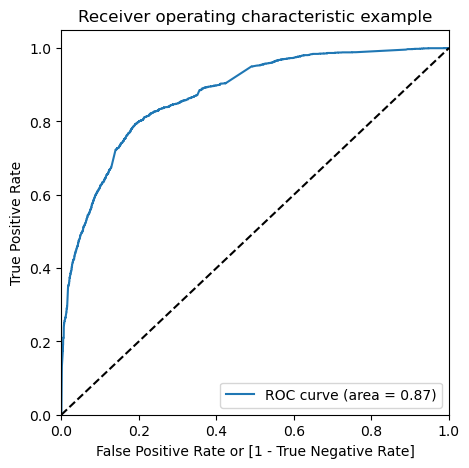

In [107]:
draw_roc(y_train_pred_final.Converted, y_train_pred_final.Converted_prob)

#### Observation/Inference: the above curve is with an orbitrary value of 0.5 we will still try to get a balanced specificity and sensitivity

### Step - (5.3) Finding Optimal Cutoff Point

In [108]:
# Let's create columns with different probability cutoffs 
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.Converted_prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

,Converted,Converted_prob,Prospect ID,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,1,0.916333,9196,1,1,1,1,1,1,1,1,1,1,1
1,0,0.496459,4696,0,1,1,1,1,1,0,0,0,0,0
2,0,0.241929,3274,0,1,1,1,0,0,0,0,0,0,0
3,0,0.291502,2164,0,1,1,1,0,0,0,0,0,0,0
4,1,0.602144,1667,1,1,1,1,1,1,1,1,0,0,0


In [109]:
# Now we will re-calculate accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['Probability','Accuracy','Sensitivity','Specificity'])
from sklearn.metrics import confusion_matrix

# TP = confusion[1,1] # true positive 
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     Probability  Accuracy  Sensitivity  Specificity
0.0          0.0  0.380565     1.000000     0.000000
0.1          0.1  0.591032     0.984067     0.349562
0.2          0.2  0.731291     0.890985     0.633179
0.3          0.3  0.788096     0.822642     0.766873
0.4          0.4  0.804532     0.763522     0.829727
0.5          0.5  0.795915     0.651992     0.884338
0.6          0.6  0.786660     0.564361     0.923235
0.7          0.7  0.775012     0.488470     0.951056
0.8          0.8  0.756024     0.402516     0.973210
0.9          0.9  0.711664     0.255765     0.991757


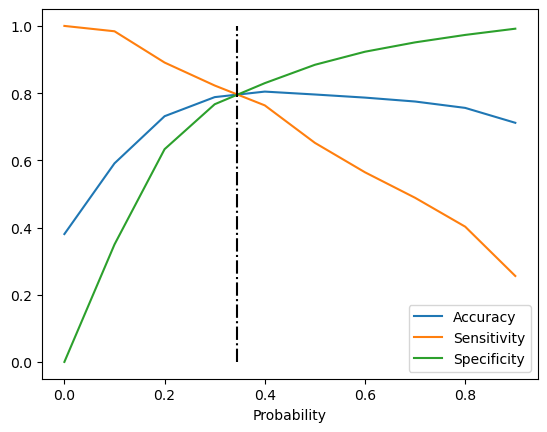

In [110]:
# Plotting accuracy sensitivity and specificity for various probabilities.
cutoff_df.plot.line(x='Probability', y=['Accuracy','Sensitivity','Specificity'])
plt.vlines(x=0.345, ymax=1, ymin=0.0, colors= 'black',linestyles='-.')
plt.show()

#### Observation/Inference: From the curve above, 0.34 is the optimum point to take it as a cutoff probability. we will continue with 0.3

In [111]:
y_train_pred_final['Final_predicted'] = y_train_pred_final.Converted_prob.map( lambda x: 1 if x > 0.3 else 0)

y_train_pred_final.head()

,Converted,Converted_prob,Prospect ID,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,Final_predicted
0,1,0.916333,9196,1,1,1,1,1,1,1,1,1,1,1,1
1,0,0.496459,4696,0,1,1,1,1,1,0,0,0,0,0,1
2,0,0.241929,3274,0,1,1,1,0,0,0,0,0,0,0,0
3,0,0.291502,2164,0,1,1,1,0,0,0,0,0,0,0,0
4,1,0.602144,1667,1,1,1,1,1,1,1,1,0,0,0,1


In [112]:
# Let's check the overall accuracy.
metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.Final_predicted)

0.7880963778522418

In [113]:
confusion2 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.Final_predicted )
confusion2

array([[2977,  905],
       [ 423, 1962]], dtype=int64)

In [114]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [115]:
# Let's see the sensitivity of our logistic regression model
Sen = TP / float(TP+FN)
print('Sensitivity is - ', Sen)

# Let's see the Specificity of our logistic regression model
Spe = TN / float(TN+FP)
print('Specificity is - ', Spe)

FPR = FP / float(TN+FP)
print('False Positive Rate is - ', FPR)

# positive predictive value 
PPV = TP / float(TP+FP)
print('Positive predictive value is - ', PPV)

# Negative predictive value
NPV = TN / float(TN+FN)
print('Negative predictive value is - ', NPV)

Sensitivity is -  0.8226415094339623
Specificity is -  0.7668727460072128
False Positive Rate is -  0.23312725399278722
Positive predictive value is -  0.6843390303453086
Negative predictive value is -  0.8755882352941177


### Step - (5.4) Precision and Recall

In [116]:
from sklearn.metrics import precision_score, recall_score

In [117]:
precision_score(y_train_pred_final.Converted, y_train_pred_final.Predicted)

0.7759481037924152

In [118]:
recall_score(y_train_pred_final.Converted, y_train_pred_final.Predicted)

0.6519916142557652

In [119]:
from sklearn.metrics import precision_recall_curve

In [120]:
p, r, thresholds = precision_recall_curve(y_train_pred_final.Converted, y_train_pred_final.Converted_prob)

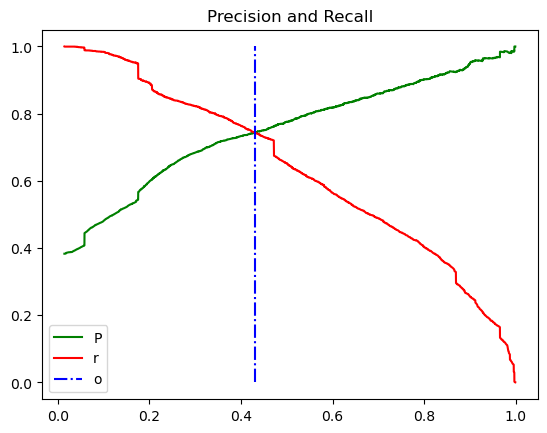

In [121]:
plt.plot(thresholds, p[:-1], "g-")
plt.plot(thresholds, r[:-1], "r-")
plt.vlines(x=0.43, ymax=1, ymin=0.0, colors= 'blue',linestyles='-.')
plt.title("Precision and Recall")
plt.legend('Probability')
plt.show()

#### Observation/Inference: If we consider 'Precision and Recall' as our main evaluation metrics, then above curve indicates that the optimal cut-off point should be 0.43

### Step - (5.5) Predictions on the Test dataset


In [122]:
# Scaling the test data

X_test[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']] = scaler.transform(X_test[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']])

In [123]:
X_test = X_test[col]
X_test.head()

,Do Not Email,Total Time Spent on Website,Lead Source_Direct Traffic,Lead Source_Organic Search,Lead Source_Reference,Lead Source_Welingak Website,Last Activity_SMS Sent,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional
7681,0,-0.304384,1,0,0,0,1,0,1,0
984,0,-0.538073,0,1,0,0,1,0,1,0
8135,1,0.794688,1,0,0,0,1,0,0,0
6915,0,-0.614753,0,0,0,0,0,0,1,0
2712,0,-0.412100,0,0,0,0,0,0,1,0


In [124]:
X_test_sm = sm.add_constant(X_test)

In [125]:
# Let's make the prediction on the test data set
y_test_pred = res.predict(X_test_sm)

In [126]:
y_test_pred[:10]

7681    0.435399
984     0.454419
8135    0.148988
6915    0.212124
2712    0.245015
244     0.283582
4698    0.187144
8287    0.057881
6791    0.462734
8970    0.267454
dtype: float64

In [127]:
# Converting y_pred to a dataframe which is an array
y_pred_tst = pd.DataFrame(y_test_pred)

In [128]:
y_pred_tst.head()

,0
7681,0.435399
984,0.454419
8135,0.148988
6915,0.212124
2712,0.245015


In [129]:
# Converting y_test to dataframe
y_test_df = pd.DataFrame(y_test)

# assigning 'Prospect ID' as the index
y_test_df['Prospect ID'] = y_test_df.index

# Removing index for both dataframes to append them side by side 
y_pred_tst.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)

# Appending both y_test_df and y_pred_tst
y_pred_final = pd.concat([y_test_df, y_pred_tst],axis=1)
y_pred_final= y_pred_final.rename(columns={ 0 : 'Converted_prob'})


In [130]:
y_pred_final = y_pred_final[['Prospect ID','Converted','Converted_prob']]

In [131]:
y_pred_final.head()

,Prospect ID,Converted,Converted_prob
0,7681,0,0.435399
1,984,0,0.454419
2,8135,0,0.148988
3,6915,0,0.212124
4,2712,1,0.245015


### Finally let's assign the lead score to each entry based on our Converted_probability number

In [132]:
y_pred_final['Lead_score'] = y_pred_final.Converted_prob.map(lambda x: round (x*100))
y_pred_final.head()

,Prospect ID,Converted,Converted_prob,Lead_score
0,7681,0,0.435399,44
1,984,0,0.454419,45
2,8135,0,0.148988,15
3,6915,0,0.212124,21
4,2712,1,0.245015,25


In [133]:
y_pred_final ['Model_predicted'] = y_pred_final.Converted_prob.map(lambda x:1 if x>0.3 else 0)
y_pred_final.head()

,Prospect ID,Converted,Converted_prob,Lead_score,Model_predicted
0,7681,0,0.435399,44,1
1,984,0,0.454419,45,1
2,8135,0,0.148988,15,0
3,6915,0,0.212124,21,0
4,2712,1,0.245015,25,0


In [134]:
# Let's check the overall accuracy.
metrics.accuracy_score(y_pred_final.Converted, y_pred_final.Model_predicted)

0.7944899478778853

In [135]:
confusion5 = metrics.confusion_matrix(y_pred_final.Converted, y_pred_final.Model_predicted)
confusion5

array([[1282,  394],
       [ 158,  852]], dtype=int64)

In [136]:
TP = confusion5[1,1] # true positive 
TN = confusion5[0,0] # true negatives
FP = confusion5[0,1] # false positives
FN = confusion5[1,0] # false negatives

In [137]:
# Let's see the sensitivity of our logistic regression model
Sen = TP / float(TP+FN)
print('Sensitivity is - ', Sen)

# Let's see the Specificity of our logistic regression model
Spe = TN / float(TN+FP)
print('Specificity is - ', Spe)

FPR = FP / float(TN+FP)
print('False Positive Rate is - ', FPR)

# positive predictive value 
PPV = TP / float(TP+FP)
print('Positive predictive value is - ', PPV)

# Negative predictive value
NPV = TN / float(TN+FN)
print('Negative predictive value is - ', NPV)


Sensitivity is -  0.8435643564356435
Specificity is -  0.7649164677804295
False Positive Rate is -  0.2350835322195704
Positive predictive value is -  0.6837881219903692
Negative predictive value is -  0.8902777777777777


In [138]:
precision_score(y_pred_final.Converted, y_pred_final.Model_predicted)

0.6837881219903692

In [139]:
recall_score(y_pred_final.Converted, y_pred_final.Model_predicted)

0.8435643564356435

In [140]:
# Re-printing the model summary 

print(res.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:              Converted   No. Observations:                 6267
Model:                            GLM   Df Residuals:                     6256
Model Family:                Binomial   Df Model:                           10
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2679.2
Date:                Tue, 20 Jun 2023   Deviance:                       5358.4
Time:                        14:42:18   Pearson chi2:                 6.47e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.3773
Covariance Type:            nonrobust                                         
                                                           coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------

### Observation/Inference:
Model produced following results on train and test dataset :

      Train data
- Accuracy - 78.80%
- Sensitivity - 82.26%
- Specificity - 76.68%

      Test data
- Accuracy - 79.44%
- Sensitivity - 84.35%
- Specificity - 76.49%

##### Model is performing well with both test and train data sets, recall score or Sensitivity is above ~80% in both scenarios which boosts overall confidence of the model.

### Conclusion:
 - Top features that are impacting the conversion rate positively are :
    - Lead sources originating from 'Welingak Website'
    - Customers that are working professionals tend to join the courses compared to other occupations
    - Lead sources originating from 'Reference'
    
 - If the customer has opted 'Do not email' option they are most likely uninterested in the program and we can avoid wasting time on such leads.

- There are few areas where we see room for improvement in terms of conversion rate:
    - Under the feature 'Lead Origin' we have categories such as 'Landing Page Submission' and 'API', here even though we have a       decent amount of leads volume they are not getting converted efficiently, team can dive deep into this.
    - Lead source is an important feature during our initital EDA it is found that both 'Google' and 'Direct Traffic' is               generating very similar amount of lead volume however the 'Direct Traffic' leads' conversion is not up to the mark,             perhaps sales team can probably find an alternative approach to these leads.
    - Sales team also has to relook at leads that are sourcing through 'Olark Chat' to understand if the process is user               friendly or not because conversion rate is low compared to its volume.